# Télécharger et charger le jeu de données

In [1]:
import os
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Télécharger le jeu de données à partir de Kaggle
loan = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "taweilo/loan-approval-classification-data/versions/1",
    "loan_data.csv",
)

# Jeu de données utilisé en exemple: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data
# Propriétaire: Ta-wei Lo (Kaggle)

# Explorer la structure du jeu de données

In [2]:
loan.head() # # 5 premieres entrées
loan.info() # Type de chaque attribut (exple: catégorie, numérique)
loan.describe() # Statistiques des attributs de type numérique

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [3]:
# Decompte des niveaux pour chaque attribut catégoriel
for col in loan.select_dtypes(include='object').columns:
    print(f"\n --- {col} ---")
    print(loan[col].value_counts())


 --- person_gender ---
person_gender
male      24841
female    20159
Name: count, dtype: int64

 --- person_education ---
person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

 --- person_home_ownership ---
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

 --- loan_intent ---
loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

 --- previous_loan_defaults_on_file ---
previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64


array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>,
        <Axes: title={'center': 'person_emp_exp'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>,
        <Axes: title={'center': 'loan_percent_income'}>],
       [<Axes: title={'center': 'cb_person_cred_hist_length'}>,
        <Axes: title={'center': 'credit_score'}>,
        <Axes: title={'center': 'loan_status'}>]], dtype=object)

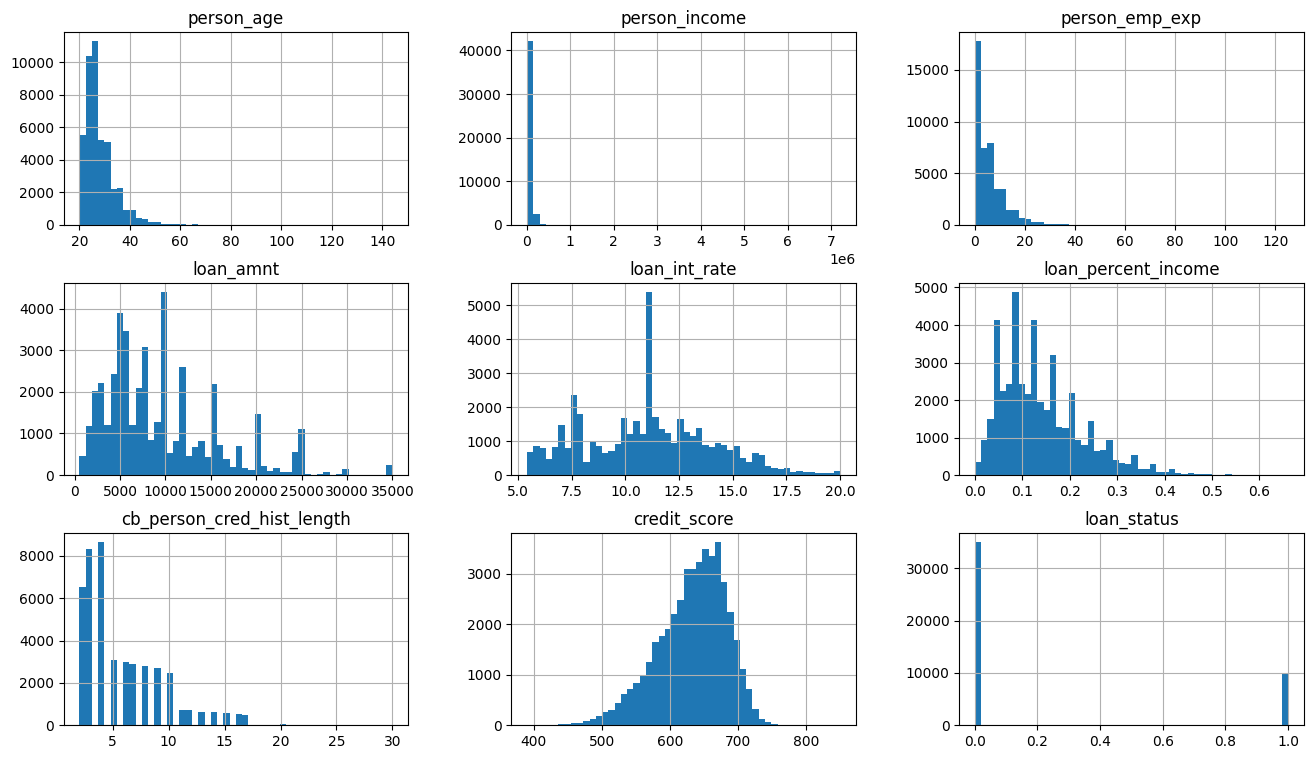

In [4]:
# Histogramme des attributs numériques

%matplotlib inline
import matplotlib.pyplot as plt
loan.hist(bins=50, figsize=(16,9))

# Créer le jeu de données de test

In [5]:
# Supposons une stratification sous-jacente des données par sexe, éducation et type de logement
# Créez une nouvelle colonne pour prendre en compte ces stratifications lors de la division

import numpy as np

# Création d'une catégorie 'strata'
loan["strata"] = loan["person_gender"].astype(str) +  "_" + loan["person_home_ownership"].astype(str)

loan["strata"].value_counts()

strata
male_RENT          12921
female_RENT        10522
male_MORTGAGE      10214
female_MORTGAGE     8275
male_OWN            1639
female_OWN          1312
male_OTHER            67
female_OTHER          50
Name: count, dtype: int64

In [6]:
# Division du jeu de donnés en données d'apprentissage et de test, avec groupage par l'attribut 'strata'

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(loan, loan["strata"]):
    strat_train_set = loan.loc[train_index]
    strat_test_set = loan.loc[test_index]

for set_ in (strat_train_set, strat_test_set):
    set_.drop("strata", axis=1, inplace=True)

# Découverte et visualisation des données

In [7]:
# Copie des données pour l'apprentissage
loan = strat_train_set.copy()

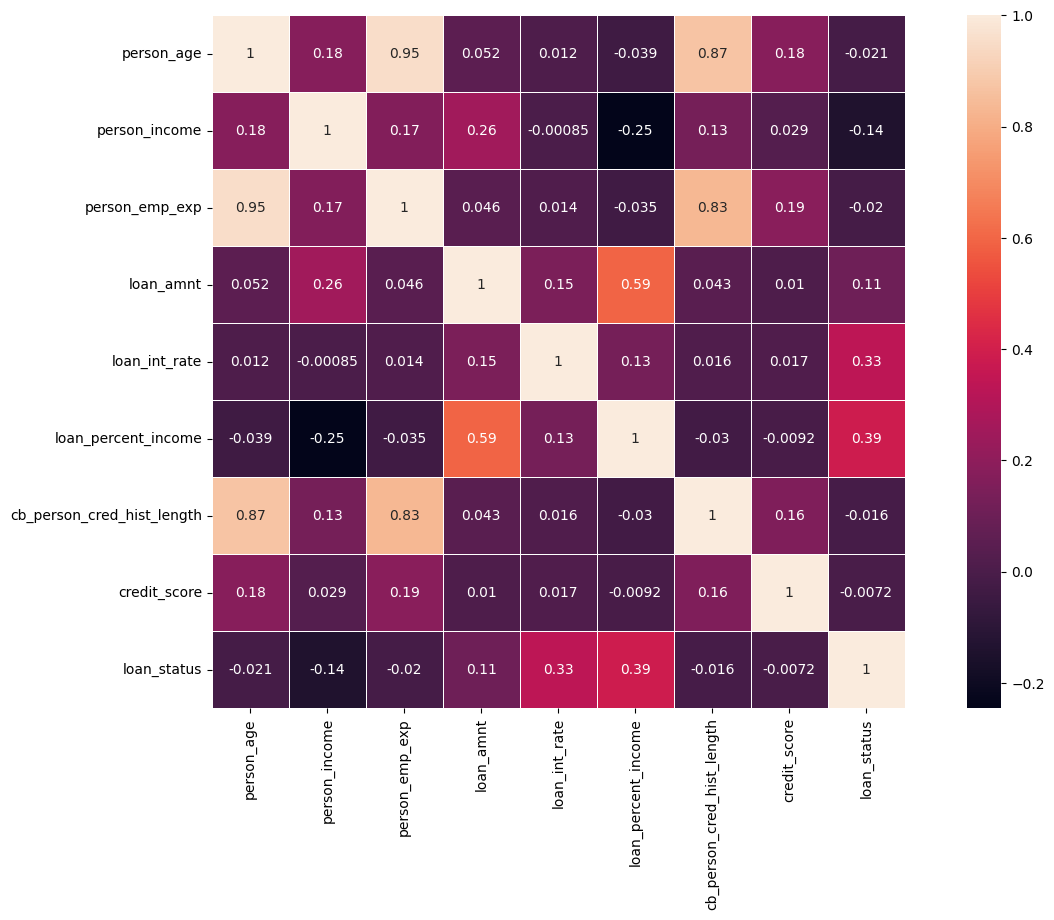

In [8]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.color_palette("colorblind")

# Evaluation de la correlation entre attributs de type numerique
loan_numeric = loan.select_dtypes(exclude=['object', 'category'])
corr_matrix = loan_numeric.corr()

# Visualization de la correlation 
plt.figure(figsize=(16, 9))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, square=True)
plt.savefig("eda.pdf", format="pdf", bbox_inches="tight", dpi=300) # Saving the plot as .pdf
plt.show()

# Remarque : On pourrait décider de se concentrer uniquement sur les attributs prometteurs et de supprimer l'un 
#            de deux attributs fortement corrélés, par exemple, supprimer 'person_exempt' et conserver 'person_age', etc.

/tmp/ipykernel_161131/3038324024.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_numeric, x="loan_status", y="loan_amnt", palette='colorblind', width=0.5)


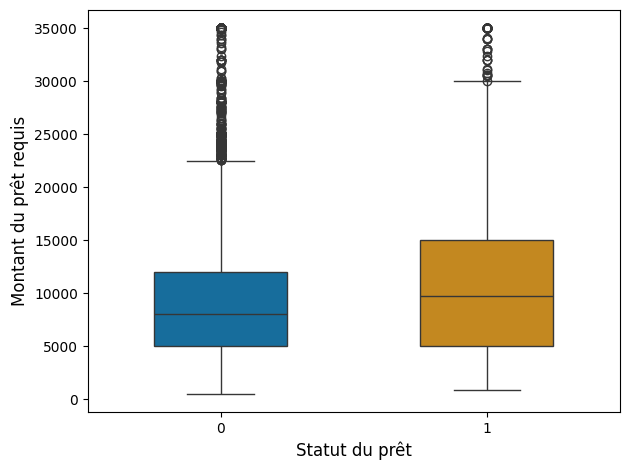

In [9]:
# Visualisation du déséquilibre entre les classes cibles et certains attributs intéressants
sns.boxplot(data=loan_numeric, x="loan_status", y="loan_amnt", palette='colorblind', width=0.5)
plt.xlabel('Statut du prêt', fontsize=12)
plt.ylabel('Montant du prêt requis', fontsize=12)
plt.tight_layout()
plt.savefig("imbalance_FR.pdf", format="pdf", bbox_inches="tight", dpi=300) # Saving the plot as .pdf
plt.show()

In [10]:
# Transformation des attributs faiblements correlés avec l'attribut "loan_status"

loan_numeric["logPerson_age"] = np.log(loan_numeric["person_age"])
loan_numeric["logPerson_emp_exp"] = np.log(loan_numeric["person_emp_exp"])
loan_numeric["logCb_person_cred_hist_length"] = np.log(loan_numeric["cb_person_cred_hist_length"])

# Matrice de correlation
corr_matrix = loan_numeric.corr()
corr_matrix["loan_status"].sort_values(ascending=False)

## Note: La transformation Logarithmique n'améliore pas la corrélation

/media/christian/22F4BCAE291A75E1/Learning/MLenv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


loan_status                      1.000000
loan_percent_income              0.385068
loan_int_rate                    0.333539
loan_amnt                        0.109343
credit_score                    -0.007167
logPerson_emp_exp               -0.015550
cb_person_cred_hist_length      -0.015802
person_emp_exp                  -0.019743
logCb_person_cred_hist_length   -0.020515
person_age                      -0.021408
logPerson_age                   -0.024302
person_income                   -0.142530
Name: loan_status, dtype: float64

# Préparation des Données pour les Algorithmes de ML

In [11]:
## Remarques : 
##       1.- ces données sont propres et ne comportent aucune donnée manquante, il n'est donc pas nécessaire de procéder à une imputation.
##       2.- D'autres transformations que la transformation logarithmique pourraient être testées, mais nous préférons rester simples.

# Fetching the training dataset again
loan = strat_train_set.drop("loan_status", axis=1)
loan_labels = strat_train_set["loan_status"].copy()

# Récupération des données d'entraînement
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Pipeline de standardization des attributs numériques
num_pipeline = Pipeline([
    ('attribs_scaler', StandardScaler()),
])

# Pipeline de One-hot-encoding des attributs categoriels
cat_pipeline = Pipeline([
    ('attribs_encoder', OneHotEncoder()),
])

## Pipeline complet
num_attribs = list(loan.select_dtypes(include=['float64', 'int64']))
cat_attribs = list(loan.select_dtypes(exclude=['float64', 'int64']))

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

loan_prepared = full_pipeline.fit_transform(loan)

# Sélection et entraînement de modèles

In [12]:
# Evaluation sur les données d'entraînement : validation croisée

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

score = "roc_auc" # ou 'f1'

# Classifieur par descente de gradient stochastique
sgd_clf = SGDClassifier(random_state=42)
sgd_roc_auc_scores = cross_val_score(sgd_clf, loan_prepared, loan_labels,
                        scoring=score, cv=10)

# Regression logistique
log_reg = LogisticRegression()
log_roc_auc_scores = cross_val_score(log_reg, loan_prepared, loan_labels,
                        scoring=score, cv=10)

# Analyse discriminante linéaire
lda_clf = LinearDiscriminantAnalysis()
lda_roc_auc_scores = cross_val_score(lda_clf, loan_prepared, loan_labels,
                        scoring=score, cv=10)

# Analyse discriminante quadratique
qda_clf = QuadraticDiscriminantAnalysis()
qda_roc_auc_scores = cross_val_score(qda_clf, loan_prepared, loan_labels,
                        scoring=score, cv=10)

# k-plus proches voisins
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_roc_auc_scores = cross_val_score(knn_clf, loan_prepared, loan_labels,
                        scoring=score, cv=10)

/media/christian/22F4BCAE291A75E1/Learning/MLenv/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/media/christian/22F4BCAE291A75E1/Learning/MLenv/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/media/christian/22F4BCAE291A75E1/Learning/MLenv/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/media/christian/22F4BCAE291A75E1/Learning/MLenv/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance m

/tmp/ipykernel_161131/2123796872.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='ROC AUC Scores', data=df, palette='colorblind', width=0.5)


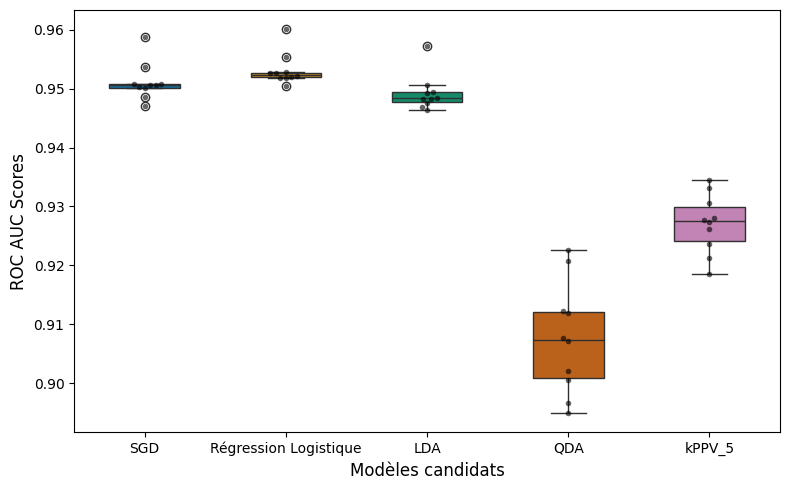

In [13]:
# Visualisation des performances sur plusieurs modèles (scores ROC AUC, plus le score est élevé, mieux c'est)

def boxplot_scores(scores_dict):
    """
    Visualizer les grapgiques "boxplots" pour le ROC AUC de plusieurs modèles à partir des scores de validation croisée.
    
    Paramètres
    ----------
    scores_dict : dict
        Dictionnaire où les clés sont les noms des modèles (str) et les valeurs sont des listes de scores RMSE.
        Exemple :
            {
                "SGD Classifier": [0.42, 0.39, 0.41, ...],
                "LDA": [0.36, 0.35, 0.37, ...],
                "Logistic Regression": [0.50, 0.48, 0.51, ...]
            }
    """

    # Convertir le dictionnaire en DataFrame au format long
    df = pd.DataFrame({
        "Model": [model for model, scores in scores_dict.items() for _ in scores],
        "ROC AUC Scores": [score for scores in scores_dict.values() for score in scores]
    })
    
    # Créer le graphique
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Model', y='ROC AUC Scores', data=df, palette='colorblind', width=0.5)
    sns.swarmplot(x='Model', y='ROC AUC Scores', data=df, color='black', alpha=0.6, size=4)
    
    # Formatage du graphique
    plt.xlabel('Modèles candidats', fontsize=12)
    plt.ylabel('ROC AUC Scores', fontsize=12)
    plt.tight_layout()
    plt.savefig("roc_auc_scores_FR.pdf", format="pdf", bbox_inches='tight', dpi=300) # Saving the plot as .pdf
    plt.show()

boxplot_scores({"SGD":sgd_roc_auc_scores, "Régression Logistique":log_roc_auc_scores,
                "LDA":lda_roc_auc_scores, "QDA":qda_roc_auc_scores, "kPPV_5":knn_roc_auc_scores})

# Note: Logistic regression seems to perform best (highest ROC AUC scores) and will be fine-tuned
#       However it might be interesting to fine tune the SGD and LDA as well for further comparison

# Affiner le meilleur modèle (Régression Logistique)

In [14]:
# Réglage des hyperparamètres à l'aide d'une recherche aléatoire pour couvrir efficacement un vaste espace

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import loguniform

# Pipeline pour définir les itérations dans la validation croisée
pipe_crossval = Pipeline([
    ('log_reg', LogisticRegression(max_iter=1500))
])

param_distr = {
    'log_reg__C': loguniform(1e-3, 1e3),
    'log_reg__penalty': ['l1', 'l2'],
    'log_reg__solver': ['liblinear', 'saga']
}

random_search = RandomizedSearchCV(estimator=pipe_crossval,
                                param_distributions = param_distr, 
                                n_iter=5,
                                cv=5,
                                scoring='roc_auc', 
                                n_jobs=-1,
                                random_state=42,
                                verbose=2)

# Entrainer le modele pour toutes les combinaisons de paramètres
random_search.fit(loan_prepared, loan_labels)

# Meilleurs paramètres
random_search.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'log_reg__C': np.float64(0.1767016940294795),
 'log_reg__penalty': 'l1',
 'log_reg__solver': 'liblinear'}

In [15]:
# Réglage fin des paramètres du modèle à l'aide d'une recherche par grille
# Pipeline pour définir les itérations dans le cadre de la validation croisée
pipe_crossval = Pipeline([
    ('log_reg', LogisticRegression(max_iter=2000))
])

param_grid = {
    'log_reg__C': [0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19],
    'log_reg__penalty': ['l1'],
    'log_reg__solver': ['liblinear']
}

grid_search = GridSearchCV(estimator=pipe_crossval,
                           param_grid = param_grid, 
                           cv=5,
                           scoring='roc_auc', 
                           n_jobs=-1,
                           verbose=2)

# Entrainer le modele pour toutes les combinaisons de paramètres
grid_search.fit(loan_prepared, loan_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,Pipeline(step..._iter=2000))])
,param_grid,"{'log_reg__C': [0.1, 0.11, ...], 'log_reg__penalty': ['l1'], 'log_reg__solver': ['liblinear']}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [16]:
# Résultat de la recherche par grille

grid_search.best_params_    # Parametres du meilleur modèle
grid_search.best_estimator_ # Meilleur modèle

,steps,"[('log_reg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,penalty,'l1'
,dual,False
,tol,0.0001
,C,0.14
,fit_intercept,True
,intercept_scaling,1
,class_weight,None


# Ajustement du seuil de decision du meilleur modèle

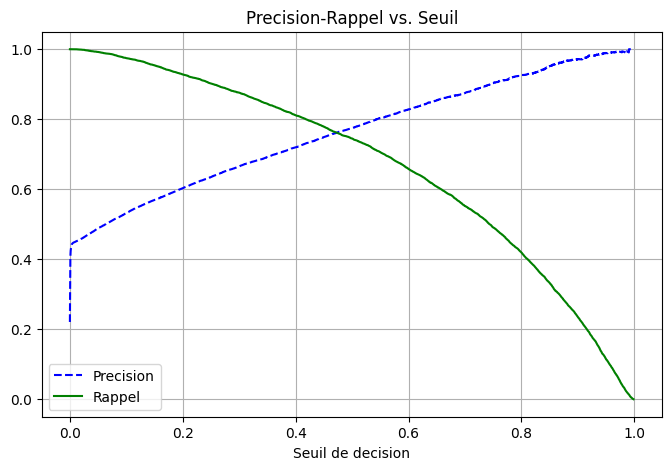

In [17]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

best_model = grid_search.best_estimator_

y_proba = best_model.predict_proba(loan_prepared)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(loan_labels, y_proba)

plt.figure(figsize=(8,5))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Rappel")
plt.xlabel("Seuil de decision")
plt.legend()
plt.title("Precision-Rappel vs. Seuil")
plt.grid(True)
plt.savefig("Seuildecision.pdf", format="pdf", bbox_inches='tight', dpi=300) # Sauvegarde du graphe en .pdf
plt.show()

# Remarque : étant donné que nous classifions les approbations de prêt, une précision plus élevée est préférable au rappel.
#            Le rappel chute rapidement après le seuil de 60 %. Cela pourrait donc être un bon choix.

# Evaluation du model sur les donnees de test

In [18]:
# Sélection du meilleur modèle obtenu par la recherche par grille

best_model = grid_search.best_estimator_

In [19]:
# Définition du jeu de données de test

X_test = strat_test_set.drop("loan_status", axis=1)
y_test = strat_test_set["loan_status"].copy()

X_test_prepared = full_pipeline.fit_transform(X_test)

In [20]:
# Exécution des prédictions sur l'ensemble de test
# Probabilités prédites pour la classe positive (1 = prêt approuvé)

y_proba_test = best_model.predict_proba(X_test_prepared)[:, 1]
threshold = 0.6
y_pred_test = (y_proba_test >= threshold).astype(int)

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("ROC AUC score:", roc_auc_score(y_test, y_pred_test))

[[6706  243]
 [ 711 1340]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6949
           1       0.85      0.65      0.74      2051

    accuracy                           0.89      9000
   macro avg       0.88      0.81      0.84      9000
weighted avg       0.89      0.89      0.89      9000

ROC AUC score: 0.8091853869653804


# Sauvegarde du modèle en vue d'un éventuel deploiement

In [21]:
# Sauvegarde du modele en fichier joblib

def save_model(model, name="model", model_path="./"):
    """
    Enregistrez le modèle sous un nom donné à un emplacement spécifique.
    
    Paramètres
    ----------
    model : 
        Le modèle entraîné.
    name :
        Le nom du fichier sous lequel enregistrer le modèle
    model_path :
        Le chemin d'accès où le modèle est enregistré
        Exemple :
            "./models/"
            
    """
    os.makedirs(model_path, exist_ok=True)
    model_name = name + ".pkl"
    pkl_path = os.path.join(model_path, model_name)
    joblib.dump(model, pkl_path)

MODEL_PATH = os.path.join("models", "loan")
save_model(best_model, name="Logistic_Regression_V1.1", model_path=MODEL_PATH)